In [4]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint


In [5]:
### PARAMETRES FONCTION PREDICTION DU TAUX DE PONTE (!!! à modifier!!!)

# Comportements de la reine/ponte
x1=385
x2=30
x3=36
x4=155 #jour de l'année où la reine pond le plus
x5=30
ELRbase=1600 # taux de ponte moyen de la reine (dépend de la reine, son âge etc ..)
SUPtreshold=0.2 # si le taux de cellules vides est inférieur à cette limite alors il y a une diminution du taux de ponte (la reine a de plus en plus de mal à trouver des cellules disponibles)
ELRstochrange=1000 # facteur stochastique du taux de ponte de la reine

#Cellules
CELLShive=250000 # nb de cellules dans la ruche


# Couvain
LIFESPANegg =3 #durée max (en jours) de l'état oeuf
LIFESPANlarvae =5 #durée max (en jours) de l'état larve
LIFESPANpupae =12 #durée max (en jours) de l'état pupe 

# Taux de mortalité
# Plus le stade est avancé et moins le taux de mortalité est élevé
MORTALITYeggs=0.03
MORTALITYlarvae=0.01
MORTALITYpupae=0.001

# Taux fixe de cannibalisme des larves en fonction de leur age (1-5 jours)
CANNIBALISMhungerbase=[0.23,0.3,0.58,0.06,0]


In [6]:
### FONCTION FACTEUR SAISON 
def f(t):
  return(1-1/(1+x1*np.exp(-2*t/x2)))

def g(t):
  return(1/(1+x3*np.exp(-2*(t-x4)/x5))) 

#Facteur saison (t en jours)
def season(t):
    return max(g(t),f(t))



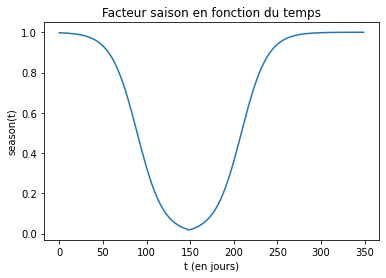

In [7]:
### PLOT SEASON
X=[i for i in range(0,350)] 
Y=[season(i) for i in X]

plt.title('Facteur saison en fonction du temps')
plt.ylabel('season(t)')
plt.xlabel('t (en jours)')

plt.plot(X,Y)
plt.show()

In [ ]:
#Nombre de cellules disponibles (vides)
def CELLSempty(t) :
  return CELLShive - CELLSbrood(t)-STORESpollen(t)-STORESnextar(t)-STOREhoney(t)


# Fonction décrivant la diminution du taux de ponte lorsque le nombre de cellules disponibles devient limité 
def SUPcomb(t):
  res = CELLSempty(t)/(CELLShive+1)
  if (res <SUPtreshold):
    return res / SUPtreshold
  else :
    return 1  

#Facteur stochastique (aléatoire) du taux de ponte
def ELRstoch():
  return randint(-ELRstochrange,ELRstochrange)



In [ ]:
### FONCTION PREDICTION DU TAUX DE PONTE 
def ELR(t):
    return ELRbase * (1+ELRstoch())*(1-season(t))*SUPcomb(t)



---



In [1]:
### FONCTIONS NOMBRE D'OEUFS

def EGGS(i,t):
    # i désigne l'âge de l'individu immature, t le jour
    if i==1 :
      return ELR(t-1) * (1-MORTALITYeggs)
    elif i==2 or i==3 :
      return EGGS(i-1,t-1)*(1-MORTALITYeggs)
    else :
      # Exception, la fonction EGGS n'est pas définie pour i qui n'appartient pas à [|1;3|]
      print('Erreur, l age i n est pas possible pour la fonction EGGS daprès le modele')
      return (-1)
 
def CELLSeggs(t):
  #nombre total d'oeuf dans la ruche à un instant t 
  return sum([EGGS(i,t) for i in range(1,LIFESPANegg+1)])


In [ ]:
### FONCTIONS NOMBRE DE LARVES

# Taux de cannibalisme des larves
def CANNIBALISMlarvae(i,t) :
  return(CANNIBALISMbase[i] *(1-(INDEXpollensituation(t-1)*INDEXnursingquality(t-1))))

# Taux de larves survivantes
def SURVIVALlarvae(i,t):
  return((1-CANNIBALISMlarvae(i,t))*(1-MORTALITYlarvae))

# Nombre de larves au stade i à un instant t
def LARVAE(i,t):
  # i désigne l'âge de l'individu immature, t le jour
  if i==1 :
    return EGGS(LIFESPANegg,t-1)*SURVIVALlarvae(1,t)
  elif i>1 and i<=LIFESPANlarvae :
    return LARVAE(i-1,t-1)*SURVIVALlarvae(i,t)
  else :
    # Exception, la fonction LARVAE n'est pas définie pour i qui n'appartient pas à [|1;LIFESPANlarvae|]
    print('Erreur, l age i n est pas possible pour la fonction LARVAE daprès le modele')
    return (-1)

def CELLSlarvae(t):
  #nombre total de larves dans la ruche à un instant t  
  return sum([LARVAE(i,t) for i in range(1,LIFESPANlarvae+1)])


In [ ]:
### FONCTIONS NOMBRE DE PUPES

# Nombre de pupes au stade i à un instant t
def PUPAE(i,t):
  # i désigne l'âge de l'individu immature, t le jour
  if i==1 :
    return LARVAE(LIFESPANlarvae,t-1)*(1-MORTALITYpupae)
  elif i>1 and i<=LIFESPANpupae :
    return PUPAE(i-1,t-1)*(1-MORTALITYpupae)
  else :
    # Exception, la fonction PUPAE n'est pas définie pour i qui n'appartient pas à [|1;LIFESPANpupae|]
    print('Erreur, l age i n est pas possible pour la fonction PUPAE daprès le modele')
    return (-1)

def CELLSpupae(t):
  #nombre total de pupes dans la ruche à un instant t  
  return sum([PUPAE(i,t) for i in range(1,LIFESPANpupae+1)])



In [ ]:
def CELLSbrood(t):
  #nombre d'individus en phase de développement dans la ruche (oeufs+larves+pupes)
  return CELLSeggs(t) + CELLSlarvae(t) + CELLSpupae(t)